Decision Boundary Equation: 4.3999999999999995 * x1 + -5.399999999999999 * x2 + -4 = 0


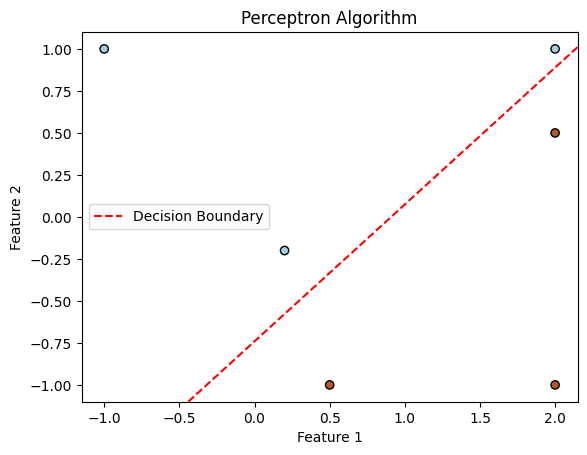

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([(2, -1), (-1, 1), (2, 0.5), (0.2, -0.2), (0.5, -1), (2, 1)])
Y = np.array([1, 0, 1, 0, 1, 0])

# Initial parameters
w = np.array([1, 0])
b = 0
learning_rate = 2

# Perceptron algorithm
for epoch in range(100):  # You can adjust the number of iterations
    for i in range(len(X)):
        z = np.dot(w, X[i]) + b
        y_pred = 1 if z >= 0 else 0
        loss = max(0, -Y[i] * y_pred)

        # Gradient descent update
        w = w + learning_rate * (Y[i] - y_pred) * X[i]
        b = b + learning_rate * (Y[i] - y_pred)

# Print the equation of the decision boundary line
print(f"Decision Boundary Equation: {w[0]} * x1 + {w[1]} * x2 + {b} = 0")

# Plotting the data and the obtained hyperplane
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.axline((-b/w[0], 0), slope=-w[0]/w[1], color='r', linestyle='--', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Algorithm')
plt.legend()
plt.show()

Decision Boundary Equation: 0.9499999999999998 * x1 + -1.45 * x2 + -1.0 = 0


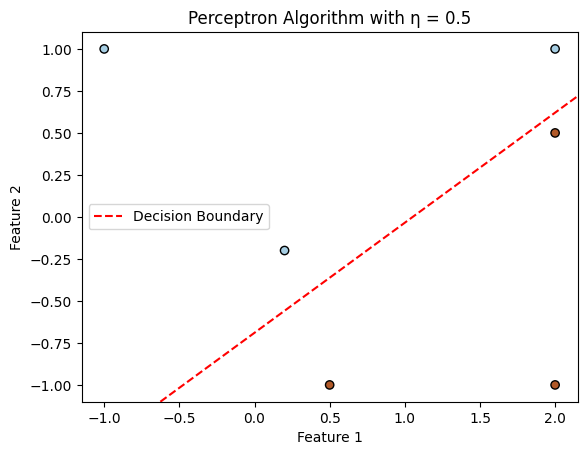

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([(2, -1), (-1, 1), (2, 0.5), (0.2, -0.2), (0.5, -1), (2, 1)])
Y = np.array([1, 0, 1, 0, 1, 0])

# Initial parameters
w = np.array([1, 0])
b = 0
learning_rate = 0.5  # Updated learning rate

# Perceptron algorithm
for epoch in range(100):  # You can adjust the number of iterations
    for i in range(len(X)):
        z = np.dot(w, X[i]) + b
        y_pred = 1 if z >= 0 else 0
        loss = max(0, -Y[i] * y_pred)

        # Gradient descent update
        w = w + learning_rate * (Y[i] - y_pred) * X[i]
        b = b + learning_rate * (Y[i] - y_pred)

# Print the equation of the decision boundary line
print(f"Decision Boundary Equation: {w[0]} * x1 + {w[1]} * x2 + {b} = 0")

# Plotting the data and the obtained hyperplane
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.axline((-b/w[0], 0), slope=-w[0]/w[1], color='r', linestyle='--', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Algorithm with η = 0.5')
plt.legend()
plt.show()


# **ES 1**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
ovariancancer_obs_path = './ovariancancer_obs.csv'
ovariancancer_grp_path = './ovariancancer_grp.csv'
A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']
n_features = A.shape[0]
n_patients = A.shape[1]
print('%d patients' % n_patients)
print('%d features' % n_features)

216 patients
4000 features


 SVD



In [ ]:
# Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(A)

# U: Left singular vectors
# S: Singular values (diagonal matrix)
# VT: Transpose of right singular vectors

# Check shapes of the matrices
print("Shape of U:", U.shape)
print("Shape of S:", S.shape)
print("Shape of VT:", VT.shape)

Shape of U: (4000, 4000)
Shape of S: (216,)
Shape of VT: (216, 216)


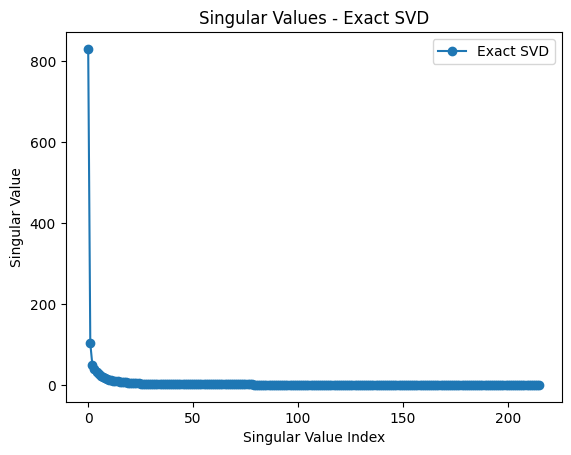

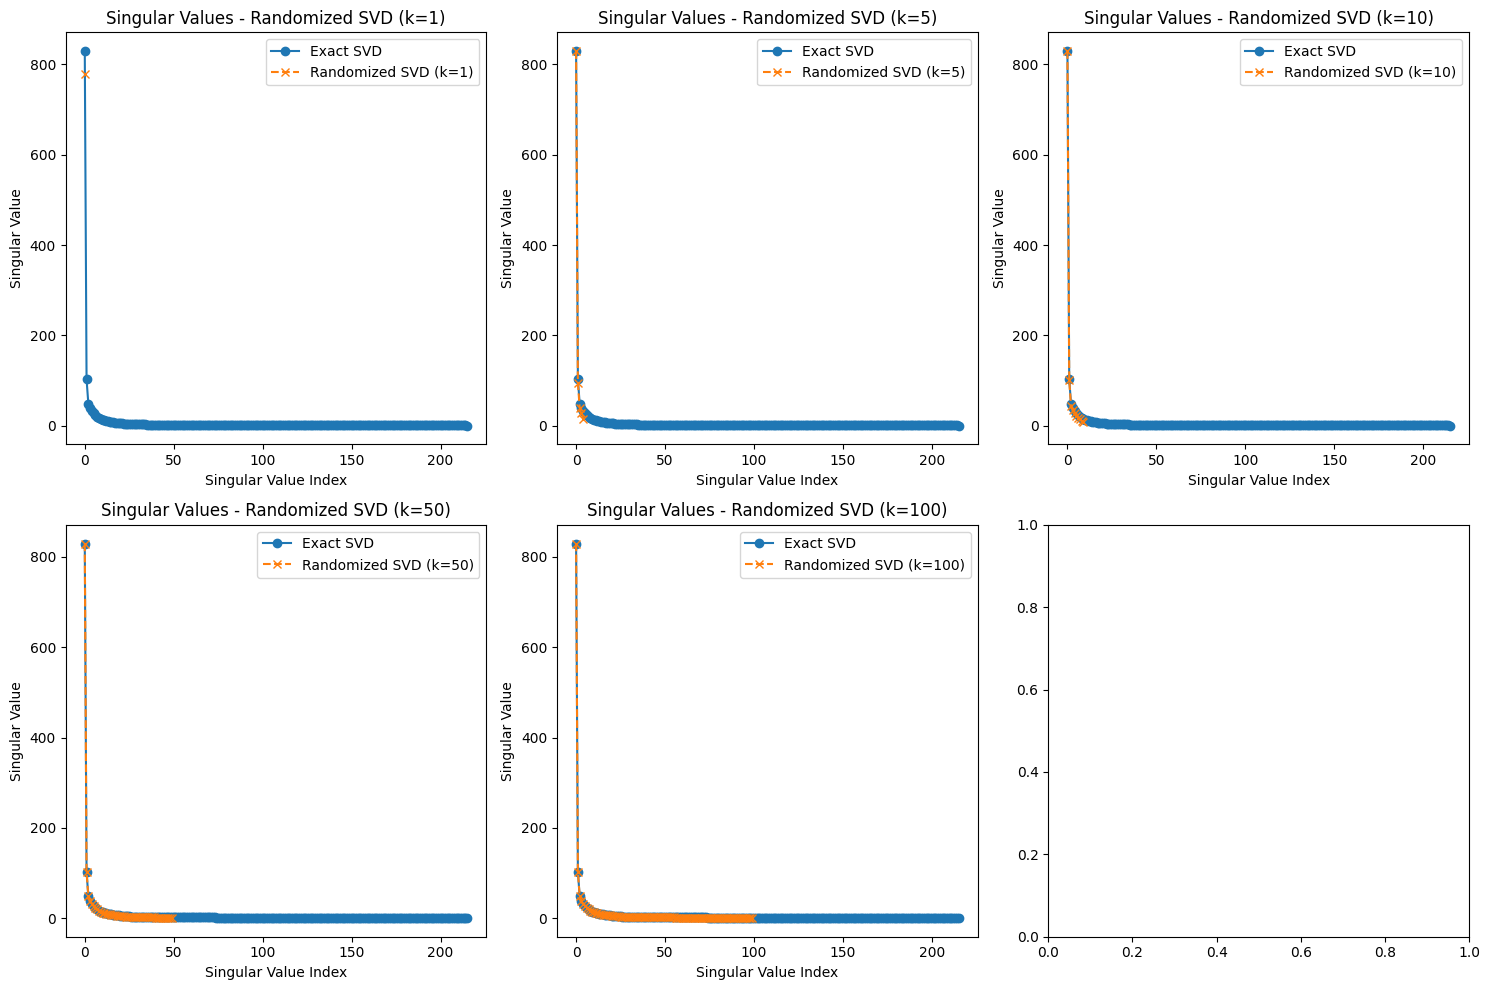

In [ ]:
# Perform exact Singular Value Decomposition (SVD)
U, S_exact, VT = np.linalg.svd(A)

# Plot the trend w.r.t. i of the singular values σi
plt.plot(S_exact, marker='o', label='Exact SVD')
plt.title('Singular Values - Exact SVD')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.legend()
plt.show()

# Perform randomized SVD for different ranks with fixed seed
np.random.seed(42)
ranks = [1, 5, 10, 50, 100]

def randomized_SVD(A, k):
    # Step 1: Generate a random matrix Omega
    m = A.shape[0]
    n = A.shape[1]
    Omega = np.random.randn(n, k)

    # Step 2: Form the sample matrix Y
    Y = np.dot(A,Omega)

    # Step 3: Orthonormalize Y using QR decomposition
    Q, _ = np.linalg.qr(Y, mode='reduced')

    # Step 4: Form the matrix B
    B = Q.T @ A

    # Step 5: Compute the SVD of B
    U_tilde, S, Vt = np.linalg.svd(B, full_matrices=False)

    # Step 6: Approximate the SVD of A
    U = Q @ U_tilde

    return U, S, Vt
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot the k-th ranked graphs in subplots
for i, k in enumerate(ranks):
    U_rand, S_rand, VT_rand = randomized_SVD(A, k)

    # Plot the approximate singular values together with the exact singular values
    ax = axes[i // 3, i % 3]
    ax.plot(S_exact, marker='o', label='Exact SVD')
    ax.plot(S_rand[:k], marker='x', linestyle='dashed', label=f'Randomized SVD (k={k})')
    ax.set_title(f'Singular Values - Randomized SVD (k={k})')
    ax.set_xlabel('Singular Value Index')
    ax.set_ylabel('Singular Value')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

Use PCA (with exact SVD) to perform dimensionality reduction on the dataset for rank k = 1, 5, 10, 50
and 100. Compute the reconstruction error of the dataset as a function of k. Repeat the same exercise by
using the randomized SVD algorithm. Repeat the same exercise by using the randomized SVD algorithm
with a +50% oversampling, that is by increasing by 50% the number of columns in the matrix random P
(round the quantity 1.5 k to the closest integer). Finally, plot the trend of the reconstruction error of the
dataset as a function of k in the three cases. Comment on the results.

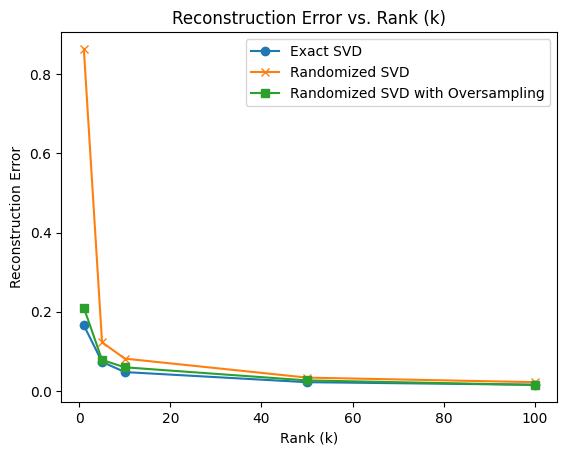

In [ ]:
# Function to calculate reconstruction error
def calculate_reconstruction_error(A, A_approx):
    return np.linalg.norm(A - A_approx) / np.linalg.norm(A)

# Perform PCA with exact SVD
U_exact, S_exact, VT_exact = np.linalg.svd(A)

# Perform PCA with randomized SVD for different ranks
ranks = [1, 5, 10, 50, 100]
reconstruction_errors_exact = []
reconstruction_errors_randomized = []
reconstruction_errors_oversampled = []

for k in ranks:
    # Exact SVD reconstruction
    A_approx_exact = U_exact[:, :k] @ np.diag(S_exact[:k]) @ VT_exact[:k, :]
    reconstruction_error_exact = calculate_reconstruction_error(A, A_approx_exact)
    reconstruction_errors_exact.append(reconstruction_error_exact)

    # Randomized SVD reconstruction
    U_rand, S_rand, VT_rand = randomized_SVD(A, k)
    A_approx_rand = U_rand @ np.diag(S_rand) @ VT_rand
    reconstruction_error_rand = calculate_reconstruction_error(A, A_approx_rand)
    reconstruction_errors_randomized.append(reconstruction_error_rand)

    # Randomized SVD with oversampling reconstruction
    oversampling_factor = round(1.5 * k)
    U_oversampled, S_oversampled, VT_oversampled = randomized_SVD(A, oversampling_factor)
    A_approx_oversampled = U_oversampled @ np.diag(S_oversampled) @ VT_oversampled
    reconstruction_error_oversampled = calculate_reconstruction_error(A, A_approx_oversampled)
    reconstruction_errors_oversampled.append(reconstruction_error_oversampled)

# Plot the trend of the reconstruction error
plt.plot(ranks, reconstruction_errors_exact, marker='o', label='Exact SVD')
plt.plot(ranks, reconstruction_errors_randomized, marker='x', label='Randomized SVD')
plt.plot(ranks, reconstruction_errors_oversampled, marker='s', label='Randomized SVD with Oversampling')
plt.title('Reconstruction Error vs. Rank (k)')
plt.xlabel('Rank (k)')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()

Make a scatterplot of the first two principal components of the patients (obtained with exact SVD), by
plotting in red patients in the group ”cancer” and in blue the patients in the remaining group. Repeat
the same exercize with a rank k = 2 randomized SVD. Compute the execution time needed to run the
SVD algorithm in the two cases. Comment on the results.

216 patients
4000 features


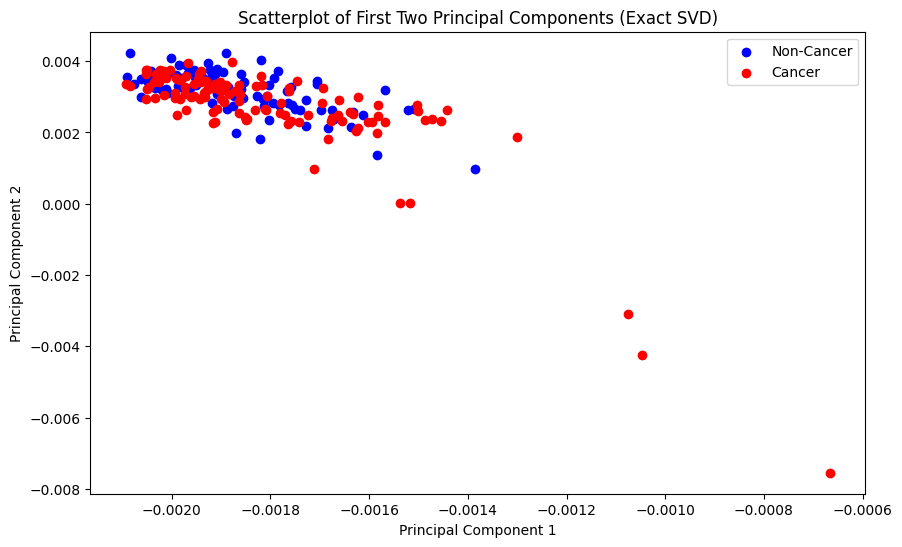

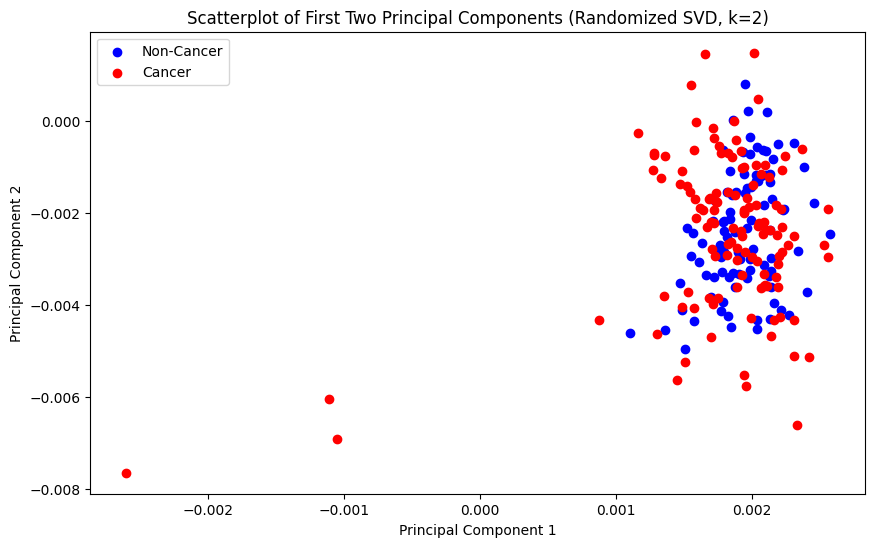

Execution Time - Exact SVD: 3.446577 seconds
Execution Time - Randomized SVD (k=2): 0.004647 seconds


In [ ]:
import time
# Load the dataset
ovariancancer_obs_path = './ovariancancer_obs.csv'
ovariancancer_grp_path = './ovariancancer_grp.csv'
A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']
n_features = A.shape[0]
n_patients = A.shape[1]
print('%d patients' % n_patients)
print('%d features' % n_features)

# Center the data
mean_centered_data = A - np.mean(A, axis=0)

# Exact SVD
start_time_exact = time.time()
U_exact, _, _ = np.linalg.svd(mean_centered_data)
execution_time_exact = time.time() - start_time_exact

# Randomized SVD (rank k = 2)
k_rank_randomized = 2
start_time_randomized = time.time()
U_rand, _, _ = randomized_SVD(mean_centered_data, k_rank_randomized)
execution_time_randomized = time.time() - start_time_randomized

# Group patients based on the "cancer" label (grp)
cancer_indices = np.where(grp == 'Cancer')[0]
non_cancer_indices = np.where(grp != 'Cancer')[0]

# Plot exact SVD results
plt.figure(figsize=(10, 6))
plt.scatter(U_exact[non_cancer_indices,0], U_exact[non_cancer_indices,1], color='blue', label='Non-Cancer')
plt.scatter(U_exact[cancer_indices,0], U_exact[cancer_indices,1], color='red', label='Cancer')
plt.title('Scatterplot of First Two Principal Components (Exact SVD)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Plot randomized SVD results
plt.figure(figsize=(10, 6))
plt.scatter(U_rand[non_cancer_indices,0], U_rand[non_cancer_indices,1], color='blue', label='Non-Cancer')
plt.scatter(U_rand[cancer_indices,0], U_rand[cancer_indices,1], color='red', label='Cancer')
plt.title(f'Scatterplot of First Two Principal Components (Randomized SVD, k={k_rank_randomized})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# Print execution times
print(f"Execution Time - Exact SVD: {execution_time_exact:.6f} seconds")
print(f"Execution Time - Randomized SVD (k={k_rank_randomized}): {execution_time_randomized:.6f} seconds")


# **ESERCIZIO 2**

In [ ]:
import numpy as np
X = np.genfromtxt('X.dat') # Features
y = np.genfromtxt('y.dat') # Labels (+1, -1)


In [ ]:
def logistic_loss(s, y):
    return np.log(1 + np.exp(-s * y))

In [ ]:
def gradient(w, xi, yi):
    s = np.dot(w, xi)
    grad = -yi * xi / (1 + np.exp(yi * s))
    return grad

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate=0.5, iterations=5000):
    N, d = X.shape
    w = np.zeros(d)

    for _ in range(iterations):
        # Choose a random data point
        i = np.random.randint(N)
        xi = X[i, :]
        yi = y[i]

        # Compute gradient and update weights
        grad = gradient(w, xi, yi)
        w = w - learning_rate * grad

    return w
def average_logistic_loss(X, y, w):
    N = len(y)
    loss_sum = 0
    for i in range(N):
        xi = X[i, :]
        yi = y[i]
        loss_sum += logistic_loss(np.dot(w, xi), yi)
    return loss_sum / N

In [ ]:
# Add a column of ones to X for the bias term
X = np.c_[np.ones(X.shape[0]), X]

# Perform Stochastic Gradient Descent
learned_weights = stochastic_gradient_descent(X, y)

# Compute the average logistic loss for the learned weights
avg_loss = average_logistic_loss(X, y, learned_weights)

print("Learned Weights:", learned_weights)
print("Average Logistic Loss:", avg_loss)

Learned Weights: [-0.37286212 -0.37286212 -0.37286212  1.57169974 -1.09287372 -1.13306002
  0.40338733 -2.35799488 -4.30087901 -1.00102247 -0.87591381  6.06695085
  5.79835121 -1.42764878 -1.05696031 -1.54754825 -0.82946598 -0.97448198
 -0.96096914 -0.20046002  0.66398185 -1.27586508  1.11125049 -2.85443321
  1.70831249 -2.85655353 -3.64911023  2.75492702 -0.22333348 -2.85443321
 -0.85286854 -0.84757257 -0.83751068  0.73138393  0.73138393  1.3306315
  1.75195417  0.77104714 -1.21228327  0.75323882  3.20557127 -4.85566389
 -0.07112629  3.00608771  0.34912282 -0.47524685 -2.54413406  0.67867835
  5.87362208]
Average Logistic Loss: 4.004954085729648


In [ ]:
def stochastic_gradient_descent2(X, y, initial_learning_rate=0.05, iterations=5000):
    N, d = X.shape
    w = np.zeros(d)
    learning_rate = initial_learning_rate

    for k in range(1, iterations + 1):
        # Choose a random data point
        i = np.random.randint(N)
        xi = X[i, :]
        yi = y[i]

        # Compute gradient and update weights with the updated learning rate
        eta_k = learning_rate / (1 + k / 100)
        grad = gradient(w, xi, yi)
        w = w - eta_k * grad

    return w

In [ ]:
X = np.genfromtxt('X.dat') # Features
y = np.genfromtxt('y.dat') # Labels (+1, -1)

# Add a column of ones to X for the bias term
X = np.c_[np.ones(X.shape[0]), X]

# Perform Stochastic Gradient Descent with the updated learning rate
learned_weights = stochastic_gradient_descent2(X, y, initial_learning_rate=0.05)

# Compute the average logistic loss for the learned weights
avg_loss = average_logistic_loss(X, y, learned_weights)

print("Learned Weights:", learned_weights)
print("Average Logistic Loss:", avg_loss)

Learned Weights: [-0.07500748 -0.02717664  0.20604691 -0.03653291  0.23313458 -0.03076679
 -0.03285239  0.0658504  -0.08204803  0.77030829  0.29463156  0.01776037
  0.03070663  0.07574572 -0.01162861 -0.01330612 -0.01288942  0.07207225
  0.04184407 -0.03680359  0.05259725 -0.03374146 -0.06644934  0.02136762
  0.04785645  0.04036503  0.08264683 -0.03374146  0.00164756  0.00180975
  0.00187234 -0.01431846 -0.01431846 -0.05989927 -0.11769327  0.00315322
 -0.02744025  0.04674377 -0.06912946  0.10506876 -0.0665754   0.28988555
  0.08706684 -0.0319164   0.04249991  0.24406056  0.27299689]
Average Logistic Loss: 0.5611670741095959


**Results with Constant Learning Rate:**
- **Learned Weights:** The values of the learned weights seem to be relatively large and may indicate overfitting. Overfitting occurs when the model captures noise in the training data, leading to poor generalization to new, unseen data.
- **Average Logistic Loss:** The average logistic loss is relatively high (4.00), indicating that the model's predictions do not align well with the true labels. This suggests that the model trained with a constant learning rate might not have converged effectively.



**Results with Updated Learning Rate:**
- **Learned Weights:** The values of the learned weights are generally smaller compared to the constant learning rate scenario. Smaller weights can help prevent overfitting and promote better generalization to new data.
- **Average Logistic Loss:** The average logistic loss is significantly lower (0.56) compared to the constant learning rate scenario. This suggests that the model trained with the updated learning rate performs better in terms of fitting the training data.

In conclusion, the results suggest that using an adaptive learning rate, as in the updated learning rate scenario, can be beneficial for training the model more effectively and preventing overfitting. It's essential to monitor the model's performance on validation or test data to ensure good generalization.

# **Esercizio 3**


In [ ]:
def initialize_params(layers_size):
    np.random.seed(0)  # for reproducibility
    params = list()
    for i in range(len(layers_size) - 1):
        W = np.random.randn(layers_size[i + 1], layers_size[i]) * np.sqrt(2 / (layers_size[i + 1] + layers_size[i]))
        b = np.zeros((layers_size[i + 1], 1))
        params.append(W)
        params.append(b)
    return params

activation = lambda x: x  # Linear activation

def ANN(x, params):
    layer = x.T  # take Transpose of x
    num_layers = int(len(params) / 2 + 1)
    weights = params[0::2]
    biases = params[1::2]
    for i in range(num_layers - 1):
        layer = np.dot(weights[i], layer) - biases[i]
        if i < num_layers - 2:
            layer = activation(layer)
    return layer.T

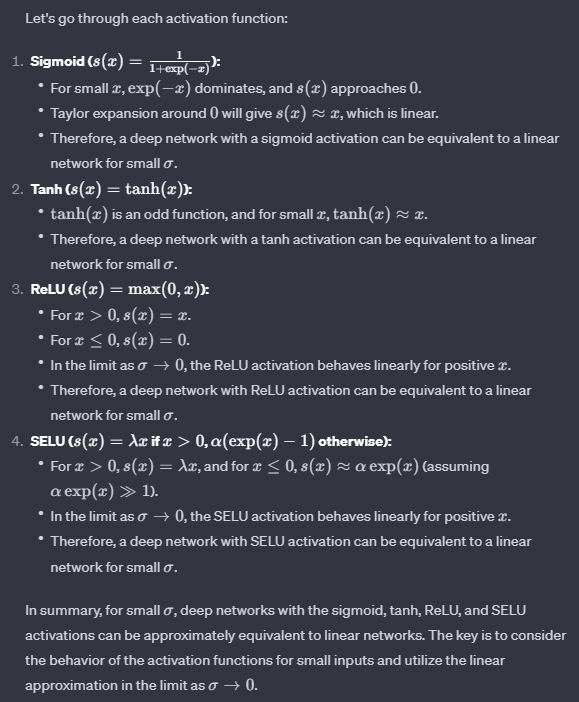